## Dataset Provided by : Dhruvil Dave - https://www.kaggle.com/dhruvildave/top-play-store-games

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nbformat 

In [2]:
pwd = os.getcwd() 
filepath = pwd + "/android-games.csv"
df = pd.read_csv(filepath)

## Viewing the Dataset
 lets read and check our dataset

In [3]:
print ('Data shape is: ', df.shape)

Data shape is:  (1730, 15)


* so we have 1730 rows and 15 columns working with
* lets take a look at the columns and general summary info.

In [4]:
pd.DataFrame({"Columns": df.columns})

,Columns
0,rank
1,title
2,total ratings
3,installs
4,average rating
5,growth (30 days)
6,growth (60 days)
7,price
8,category
9,5 star ratings


In [5]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

Great there are no missing vlaues within this dataset. That saves us some time from dealing with NAN's.
* Lets sample our dataset to explore what it contains.
* lets sample the first 8 rows.

In [6]:
df.sample(n=8)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1088,63,Crash of Cars,419851,10.0 M,4,0.5,1.2,0.0,GAME RACING,290888,48697,26055,13626,40581,False
944,19,Escape Titanic,1265308,10.0 M,4,0.0,0.0,0.0,GAME PUZZLE,980240,108412,62854,22734,91066,False
864,39,バンドリ！ ガールズバンドパーティ！,127314,1.0 M,4,0.4,1.0,0.0,GAME MUSIC,90009,16965,7215,3373,9750,False
746,21,Baby Panda's School Bus - Let's Drive!,155279,50.0 M,4,4.9,9.8,0.0,GAME EDUCATIONAL,117842,9711,6246,4458,17020,False
1126,1,Shadow Fight 3 - RPG fighting game,3170246,100.0 M,4,1.2,2.6,0.0,GAME ROLE PLAYING,2243868,353334,177840,84957,310244,False
766,41,Little Panda’s Summer: Ice Cream Bars,94157,10.0 M,4,1.9,4.5,0.0,GAME EDUCATIONAL,72545,5575,3879,2822,9334,False
318,19,1LINE – One Line with One Touch,482155,50.0 M,4,0.8,1.9,0.0,GAME BOARD,350353,50622,27688,14084,39405,False
1118,93,MOTO LOKO HD,282063,10.0 M,4,0.0,0.1,0.0,GAME RACING,196521,27353,21819,7648,28719,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


The install column can be useful for analysis. However note that it's a object type .
It may be more useful if it were an *integer (int)* or *float*.
*  May need to reformat this later on.

# Summary so far: 
*   The dataset consists of games from different categories, ratings and number of installs.
*   there are no NAN / null values.
*   **installs** can be useful for analysis. It would be good to reformat it to a numerical variable.
* **category** is a categorical variable, making it useful for groupings.
* numerical varibles should be paid close attentions to.
* should some columns be dropped ?

In [8]:
df['price'].value_counts()

0.00    1723
1.99       3
7.49       1
2.99       1
1.49       1
0.99       1
Name: price, dtype: int64

In [9]:
df['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

## Dropping Price column
we can drop the price column since most games are free and only 7 aren't, also the price of a game isn't relevant to the EDA.

In [10]:
df.drop('price', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   category          1730 non-null   object 
 8   5 star ratings    1730 non-null   int64  
 9   4 star ratings    1730 non-null   int64  
 10  3 star ratings    1730 non-null   int64  
 11  2 star ratings    1730 non-null   int64  
 12  1 star ratings    1730 non-null   int64  
 13  paid              1730 non-null   bool   
dtypes: bool(1), float64(2), int64(8), object(3)
memory usage: 177.5+ KB


## Categories Column

In [12]:
df['category'].value_counts()

GAME CARD            126
GAME WORD            104
GAME PUZZLE          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME RACING          100
GAME ACTION          100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASUAL          100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME MUSIC           100
Name: category, dtype: int64

<AxesSubplot:title={'center':'Game Categories'}>

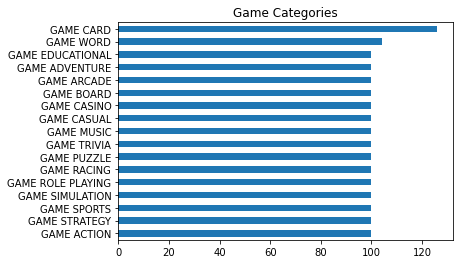

In [13]:
df['category'].value_counts(ascending=True).plot(kind='barh', title='Game Categories')

C:\Users\ro-ja\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '# of games')

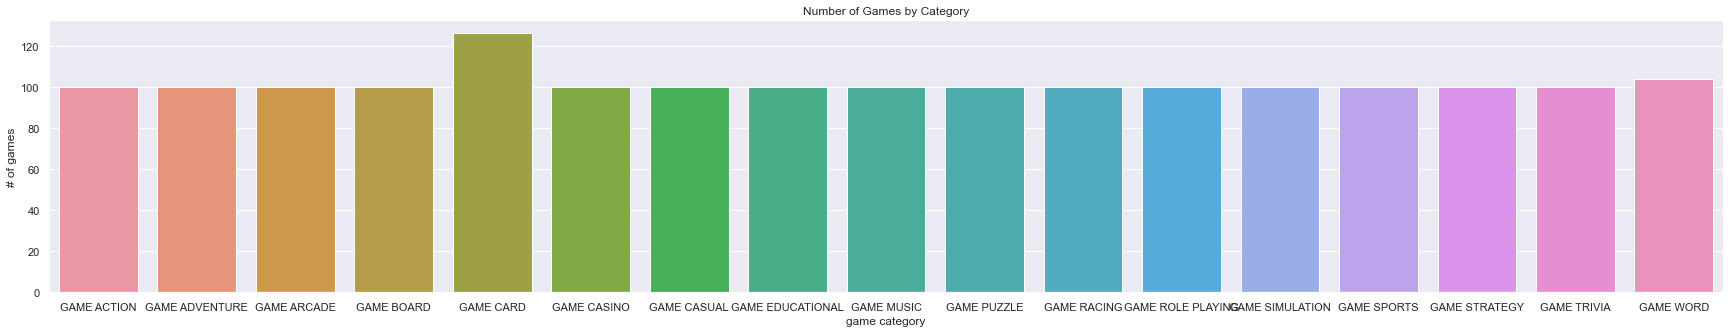

In [14]:
plt.figure(figsize=(30,5))
sns.set_theme(style="darkgrid")
sns.countplot(df['category'])
plt.title('Number of Games by Category')
plt.xlabel('game category')
plt.ylabel('# of games')

In [15]:
# using the plotly.express library
fig = px.histogram(df, x="category", title="Game Categories", labels={"category": "Categories"})
fig.update_layout(xaxis={"categoryorder":"total descending"},)
fig.update_yaxes(automargin=True)
fig.show()

## Paid vs Free games

In [16]:
df['paid'].value_counts()


False    1723
True        7
Name: paid, dtype: int64

<AxesSubplot:title={'center':'Free vs Paid games'}>

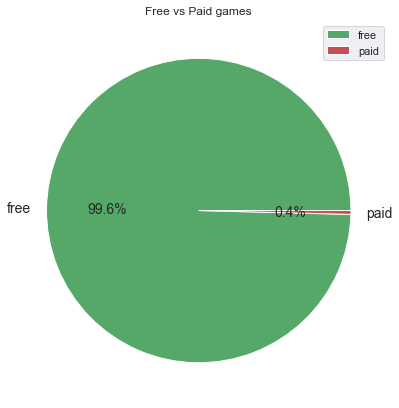

In [17]:
df['paid'].value_counts().plot(kind='pie', title='Free vs Paid games', legend=True,
                               autopct='%1.1f%%', fontsize=14, figsize=[7, 7], labels=["free", "paid"], ylabel='', colors=["g", "r"])


In [18]:
free_games = df['paid'].value_counts()
label = ['Free', 'Paid']
values = df['paid'].value_counts().values

fig = px.pie(free_games, values=values, names=label, title='Free vs Paid games', color_discrete_sequence=["springgreen", "red"])
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()


## Relationship Analysis

In [19]:
df.head(n=5)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [20]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


## Grouping

In [21]:
total_ratings_by_cateogry = df.groupby('category')['total ratings'].mean()
total_ratings_by_cateogry 


category
GAME ACTION          4.011344e+06
GAME ADVENTURE       8.935617e+05
GAME ARCADE          1.793780e+06
GAME BOARD           4.457431e+05
GAME CARD            3.326041e+05
GAME CASINO          3.619031e+05
GAME CASUAL          2.470866e+06
GAME EDUCATIONAL     1.529804e+05
GAME MUSIC           2.163020e+05
GAME PUZZLE          9.466929e+05
GAME RACING          1.139027e+06
GAME ROLE PLAYING    7.087648e+05
GAME SIMULATION      9.341417e+05
GAME SPORTS          1.353829e+06
GAME STRATEGY        1.856570e+06
GAME TRIVIA          2.982217e+05
GAME WORD            3.943603e+05
Name: total ratings, dtype: float64

N.B. Think of groupby() splits the dataset data into buckets by 'category', and then splitting
    the records inside  each category bucket by the 'total ratings'.

### Total Ratings grouped by Category

In [22]:
fig = px.bar(total_ratings_by_cateogry, x=total_ratings_by_cateogry.index, y=total_ratings_by_cateogry.values,
             labels={'y': 'Ratings'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [23]:
df['installs']

0       500.0 M
1       500.0 M
2       100.0 M
3       100.0 M
4       500.0 M
         ...   
1725      1.0 M
1726      1.0 M
1727     10.0 M
1728      5.0 M
1729     10.0 M
Name: installs, Length: 1730, dtype: object

need to convert this column to a numerical type.

In [24]:
def numbers(df):
    if df.split(".")[1].split(" ")[1] == "M":
        return int(df.split(".")[0])
    else:
        return int(df.split(".")[0])/1000
df["installs"] = df.installs.apply(numbers)
df = df.rename(columns={'installs': 'installs_in_million'})

In [25]:
df["installs_in_million"].head()

0    500.0
1    500.0
2    100.0
3    100.0
4    500.0
Name: installs_in_million, dtype: float64

it's now a type float.

### Installs in Millions grouped by Category

In [ ]:
intalls_in_million_by_category = df.groupby('category')['installs_in_million'].mean()
intalls_in_million_by_category

In [35]:
fig = px.bar(intalls_in_million_by_category, x=intalls_in_million_by_category.index, y=intalls_in_million_by_category.values,
            labels={"y":"Total Installs in Million"})
fig.update_layout(xaxis={"categoryorder":"total descending"})
fig.show()


## Growth (30 days) grouped by Category

In [36]:
df.sample(n=4)

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
668,43,My Dolphin Show,939577,50.0,4,0.3,0.7,GAME CASUAL,676889,96965,56485,26929,82307,False
655,30,Pirate Kings™️,1432166,10.0,4,0.2,0.3,GAME CASUAL,1049465,142061,64707,33473,142459,False
1224,99,원피스 트레저 크루즈,281148,1.0,4,0.0,0.0,GAME ROLE PLAYING,208788,37624,15607,3864,15262,False


In [39]:
growth = df.groupby('category')[['growth (30 days)',"growth (60 days)"]].mean()
growth

,growth (30 days),growth (60 days)
category,,
GAME ACTION,18.808000,118.294000
GAME ADVENTURE,259.101000,6.084000
GAME ARCADE,58.924000,21.970000
GAME BOARD,34.445000,587.891000
GAME CARD,746.598413,555.337302
GAME CASINO,2335.253000,2.193000
GAME CASUAL,36.020000,14.812000
GAME EDUCATIONAL,102.455000,14.748000
GAME MUSIC,24.626000,22.160000


In [42]:
fig = px.bar(growth, y="growth (30 days)",
labels={"y":"Growth (30 Days)", "category": "Category", "value":"Total Growth"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

In [50]:
fig = px.bar(growth,y="growth (60 days)",
labels={"y":"Growth (60 Days)", "category":"Category", "value":"Total Growth"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

In [53]:
fig = px.line(growth,  y=["growth (30 days)", "growth (60 days)"],title="Games Growth",
labels={"category":"Category", "values":"Total Growth"})
fig.show()